In [14]:
import matplotlib.pyplot as plt
import re
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.cluster import KMeans

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import random 

data = pd.read_json("preprocessingDoneRight.json")
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump will be appearing on the view tom...,donald trump appear view tomorrow morn ...
10,13,NaN,False,5,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,don t be afraid of being unique its like bein...,afraid uniqu like afraid best self dona...
100,3,NaN,False,15,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,the latest update on bret michaels is that hes...,latest updat bret michael he make everi...
1000,11,NaN,False,71,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china is driving the price of gold up in order...,china drive price gold order eas pressu...
10000,95,NaN,False,42,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im a big fan of the new realdona...,kevinmartinri im big fan new realdonaldt...
10001,7,NaN,False,14,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like when bush ki...,bobbassman realdonaldtrump like bush kill...
10002,29,NaN,False,40,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosby help me realdonaldtrump i am depress...,robocosbi help realdonaldtrump depress ke...
10003,158,NaN,False,219,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt it sad the way putin is toying with obama...,isnt sad way putin toy obama regard sn...
10004,21,NaN,False,24,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzots realdonaldtrump youre one of the on...,hattakzot realdonaldtrump your one voic ...


In [ ]:
#stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
#print(len(stemmed_words))
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [ ]:
#stemmed_words = stemmed_words[stemmed_words > 3]
#stemmed_words = stemmed_words[stemmed_words < 3000]
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [ ]:
#data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
#pd.Series(' '.join(data['m']).split()).value_counts()
#sentences = data[data["year"] == 2016]["m"].tolist()


In [42]:
#don't count words
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()

#pre-campaign
data1 = data[data["year"] <= 2016]
data1 = data1[data1["year"] >= 2015]
sentences = data["noTags_punct"].tolist()
#sentences = data["noTags_punct"].tolist()

In [3]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['jaayzen', 'realdonaldtrump', 'thanks', 'donald', 'now', 'run', 'for', 'president', 'fulfill', 'your', 'purpose', 'to', 'much', 'is', 'given', 'much', 'is', 'required'], tags=[0]),
 TaggedDocument(words=['teamconquerca', 'first', 'time', 'in', 'thetrump', 'international', 'hotel', 'and', 'tower', 'and', 'its', 'absolutely', 'gorgeous', 'thankyou', 'sir', 'excellent', 'hospitality'], tags=[1]),
 TaggedDocument(words=['angelatn777', 'realdonaldtrump', 'he', 'stands', 'up', 'for', 'what', 'he', 'believes', 'in', 'regardless', 'if', 'all', 'people', 'like', 'it'], tags=[2]),
 TaggedDocument(words=['jaayzen', 'he', 'has', 'all', 'the', 'ingredients', 'to', 'get', 'elected', 'and', 'turn', 'this', 'this', 'ship', 'around', 'run', 'dont', 'let', 'us', 'hit', 'the', 'iceberg'], tags=[3]),
 TaggedDocument(words=['marcaardvark', 'realdonaldtrump', 'ronmeier123', 'one', 'of', 'the', 'best', 'things', 'i', 'bought', 'in', '2014', 'realdonaldtrump', 'ties', 'macys', 'amazon']

In [4]:
len(tagged_data)

11739

In [5]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=500, min_count=4, epochs=100)

model.build_vocab(tagged_data)


In [6]:
%%time 
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


CPU times: user 2min 30s, sys: 12.4 s, total: 2min 42s
Wall time: 1min 14s


In [8]:
%%time
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()
#tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]

X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

CPU times: user 1min 18s, sys: 58.5 ms, total: 1min 18s
Wall time: 1min 18s


In [9]:
%%time
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

CPU times: user 1h 36min 43s, sys: 3h 43min 40s, total: 5h 20min 24s
Wall time: 13min 21s


In [10]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 11269,
         7: 18,
         1: 143,
         2: 63,
         17: 3,
         4: 26,
         3: 40,
         5: 22,
         12: 4,
         6: 15,
         14: 10,
         9: 11,
         39: 2,
         11: 11,
         8: 11,
         49: 2,
         32: 3,
         10: 9,
         37: 3,
         356: 1,
         21: 5,
         18: 3,
         22: 2,
         35: 4,
         15: 6,
         24: 4,
         13: 10,
         23: 3,
         19: 3,
         29: 2,
         20: 3,
         27: 1,
         42: 1,
         25: 3,
         44: 2,
         10809: 1,
         55: 1,
         45: 1,
         28: 1,
         40: 2,
         38: 1,
         76: 1,
         48: 1,
         16: 2,
         30: 2,
         52: 1,
         26: 1,
         71: 1,
         60: 1,
         64: 1,
         46: 1,
         10658: 1,
         4292: 1})

In [11]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (11738): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d500,n5,w5,mc4,s0.001,t3):

MOST (11738, 0.794131875038147): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SECOND-MOST (212, 0.7415383458137512): «miasmiiles realdonaldtrump»

MEDIAN (1911, 0.3335656523704529): «via newsmax_media by owentew trump on 2016 run i would selffund appoint wall street experts»

LEAST (10480, -0.05401665344834328): «sleeping»



In [12]:
doc_id = random.randint(0, len(tagged_data) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tagged_data[sim_id[0]].words)))


Train Document (701): «jordanwells119 i forgot how much i love theapprentice and trump so glad im watching this season all hail king realdonaldtrump»

Similar Document (1189, 0.6214659214019775): «jimdesch23 realdonaldtrump this is the best celebrity apprentice all season love someone else is getting fired»



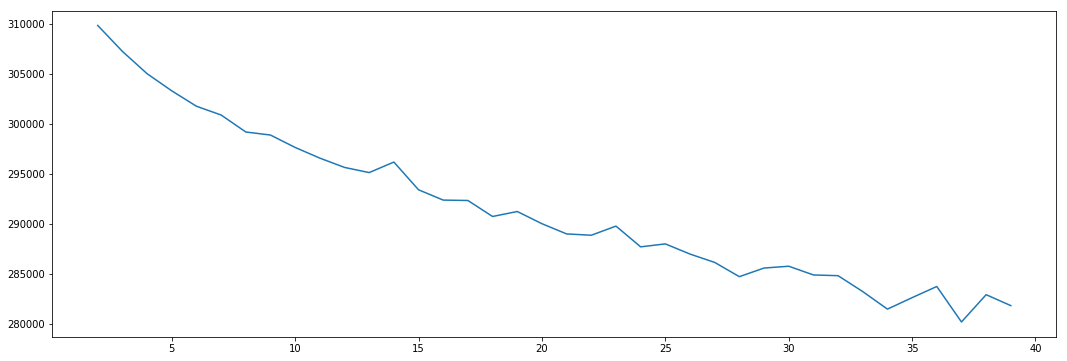

CPU times: user 40min 54s, sys: 26min 52s, total: 1h 7min 47s
Wall time: 14min 7s


In [16]:
#solo per aveere un'idea di quanti cluster
%%time
sse_list = list()
max_k = 40
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

#average 
#2 0.20235462
#3 0.17323813
#4 0.15857914
#5 0.15378755
#6 0.078243
#7 0.051599164
#8 0.036651324
#9 0.028211854


for c in range(2,10):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=c)
    clustering.fit(X)
    labels = clustering.labels_
    d = silhouette_score(X, labels,metric='cosine')
    print(c,d)

2 0.20235462
3 0.17323813
4 0.15857914
5 0.15378755
6 0.078243
7 0.051599164
8 0.036651324
9 0.028211854


In [45]:
clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=6)
clustering.fit(X)
assigned_clusters = clustering.labels_
d = silhouette_score(X, assigned_clusters,metric='cosine')

In [46]:
print(d)
NUM_CLUSTERS = 5

0.078243


In [19]:
%%time
#stemmed counted
#0.112 8 cluster 
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed counted
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200
#0.148 8 cluster con lunghezza 300

#all words not stemmed, no stopwords
#0.114 6 cluster 100
#0.136 8 cluster 100
#0.122 8 cluster 200
#0.144 8 cluster 300


#5 cluster not stemmed, 300, full sembra faccia cluster nicely, 0.14 e passa 
#4 " ", 0.142

#doc2vec trained on whole dataset, lower silhouettes, words?
#4 0.66
#6 0.64

#4 0.79 500/min 4

#usando tutto il dataset, comprese le stopwords fa cacare, la silhouette droppa uns acco


NUM_CLUSTERS = 20
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

KeyboardInterrupt: 

NameError: name 'assigned_clusters' is not defined

In [47]:
datak = data1
datak["labels"] = assigned_clusters
datak

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed,labels
18431,33,NaN,False,12,"""@JaayZen: @realDonaldTrump Thanks Donald. Now...",1,2015,0,1,2015-01-01,"""@jaayzen: @realdonaldtrump thanks donald. now...",jaayzen realdonaldtrump thanks donald run pres...,jaayzen realdonaldtrump thanks donald now run ...,jaayzen realdonaldtrump thank donald run ...,0
18432,28,NaN,False,9,"""@teamconquerca: First time in the""Trump Inter...",1,2015,0,1,2015-01-01,"""@teamconquerca: first time in the""trump inter...",teamconquerca first time thetrump internationa...,teamconquerca first time in thetrump internati...,teamconquerca first time thetrump intern ...,0
18433,36,NaN,False,15,"""@AngelaTN777: @gochico @realDonaldTrump: He S...",1,2015,0,1,2015-01-01,"""@angelatn777: @gochico @realdonaldtrump: he s...",angelatn777 realdonaldtrump stands believes re...,angelatn777 realdonaldtrump he stands up for...,angelatn777 realdonaldtrump stand believ ...,0
18434,18,NaN,False,11,"""@JaayZen: @grandmiapens He has all the ingred...",1,2015,0,1,2015-01-01,"""@jaayzen: @grandmiapens he has all the ingred...",jaayzen ingredients get elected turn ship arou...,jaayzen he has all the ingredients to get el...,jaayzen ingredi get elect turn ship aro...,0
18435,17,NaN,False,7,"""@MarcAardvark: @realDonaldTrump @ronmeier123 ...",1,2015,0,1,2015-01-01,"""@marcaardvark: @realdonaldtrump @ronmeier123 ...",marcaardvark realdonaldtrump ronmeier123 one b...,marcaardvark realdonaldtrump ronmeier123 one o...,marcaardvark realdonaldtrump ronmeier123 o...,0
18436,26,NaN,False,7,"""@PaulParmar1: @realDonaldTrump so excited for...",1,2015,0,1,2015-01-01,"""@paulparmar1: @realdonaldtrump so excited for...",paulparmar1 realdonaldtrump excited apprentice...,paulparmar1 realdonaldtrump so excited for app...,paulparmar1 realdonaldtrump excit apprenti...,0
18437,47,NaN,False,17,"""@ryanbushby: @realDonaldTrump i bet you have ...",1,2015,0,1,2015-01-01,"""@ryanbushby: @realdonaldtrump i bet you have ...",ryanbushby realdonaldtrump bet great ideas tur...,ryanbushby realdonaldtrump i bet you have some...,ryanbushbi realdonaldtrump bet great idea...,0
18438,45,NaN,False,19,"""@LLAnkers: DonaldTrump, it's a shame the lef...",1,2015,0,1,2015-01-01,"""@llankers: donaldtrump, it's a shame the left...",llankers donaldtrump shame left try hard tear ...,llankers donaldtrump its a shame the left try ...,llanker donaldtrump shame left tri hard ...,0
18439,58,NaN,False,18,"""@flicka__: @realDonaldTrump for president""",1,2015,6,1,2015-01-01,"""@flicka__: @realdonaldtrump for president""",flicka__ realdonaldtrump president,flicka__ realdonaldtrump for president,flicka__ realdonaldtrump presid,0
18440,77,NaN,False,27,The Mar-a-Lago Club was amazing tonight. Every...,1,2015,7,1,2015-01-01,the mar-a-lago club was amazing tonight. every...,maralago club amazing tonight everybody bigges...,the maralago club was amazing tonight everybod...,maralago club amaz tonight everybodi big...,0


In [48]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    print(len(c))
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

11728
Cluster 0 dimension 11728
1
Cluster 1 dimension 1
7
Cluster 2 dimension 7
1
Cluster 3 dimension 1
1
Cluster 4 dimension 1


In [ ]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,NUM_CLUSTERS):
    temp = datak[datak["labels"] == c] 
    print
    text = temp["modded1"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [ ]:
#trova un modo di clusterizzare le cose assieme ai dati / sentiment analysis

In [ ]:
datak.to_json("clustered.json")